Lab 2: Statistics

In this lab, we conducted various simulations and calculations to observe data that follow the the Gaussian and Poisson probability distribution function. We devised functions to numerically calculate the binomial
probability from a coin flip experiment where the probability of 2 discrete outcomes are equal.
We compared this simulation of a large number of trials to the exact analytical
solution using the binomial PDF. We then observed a binomial PDF with probability of
success being very small (large number of trials used). From this observation, we could see that the Poisson PDF is a good approximation for the binomial. 

The monte carlo simulation (a frequentist method) generates random values based on the range and conditions specified. The model is calculated based on these random values. The result of the model is recorded, and the process is repeated. A typical Monte Carlo simulation calculates the model hundreds or thousands of times, each time using different randomly-selected values. The results from the simulation are used to calculate (in our case) the 
binomial probability for coin flip experiment where the probability of 2 discrete outcomes is equal

Theory:

Derivation of Poisson equation from the binomial distribution for small p:

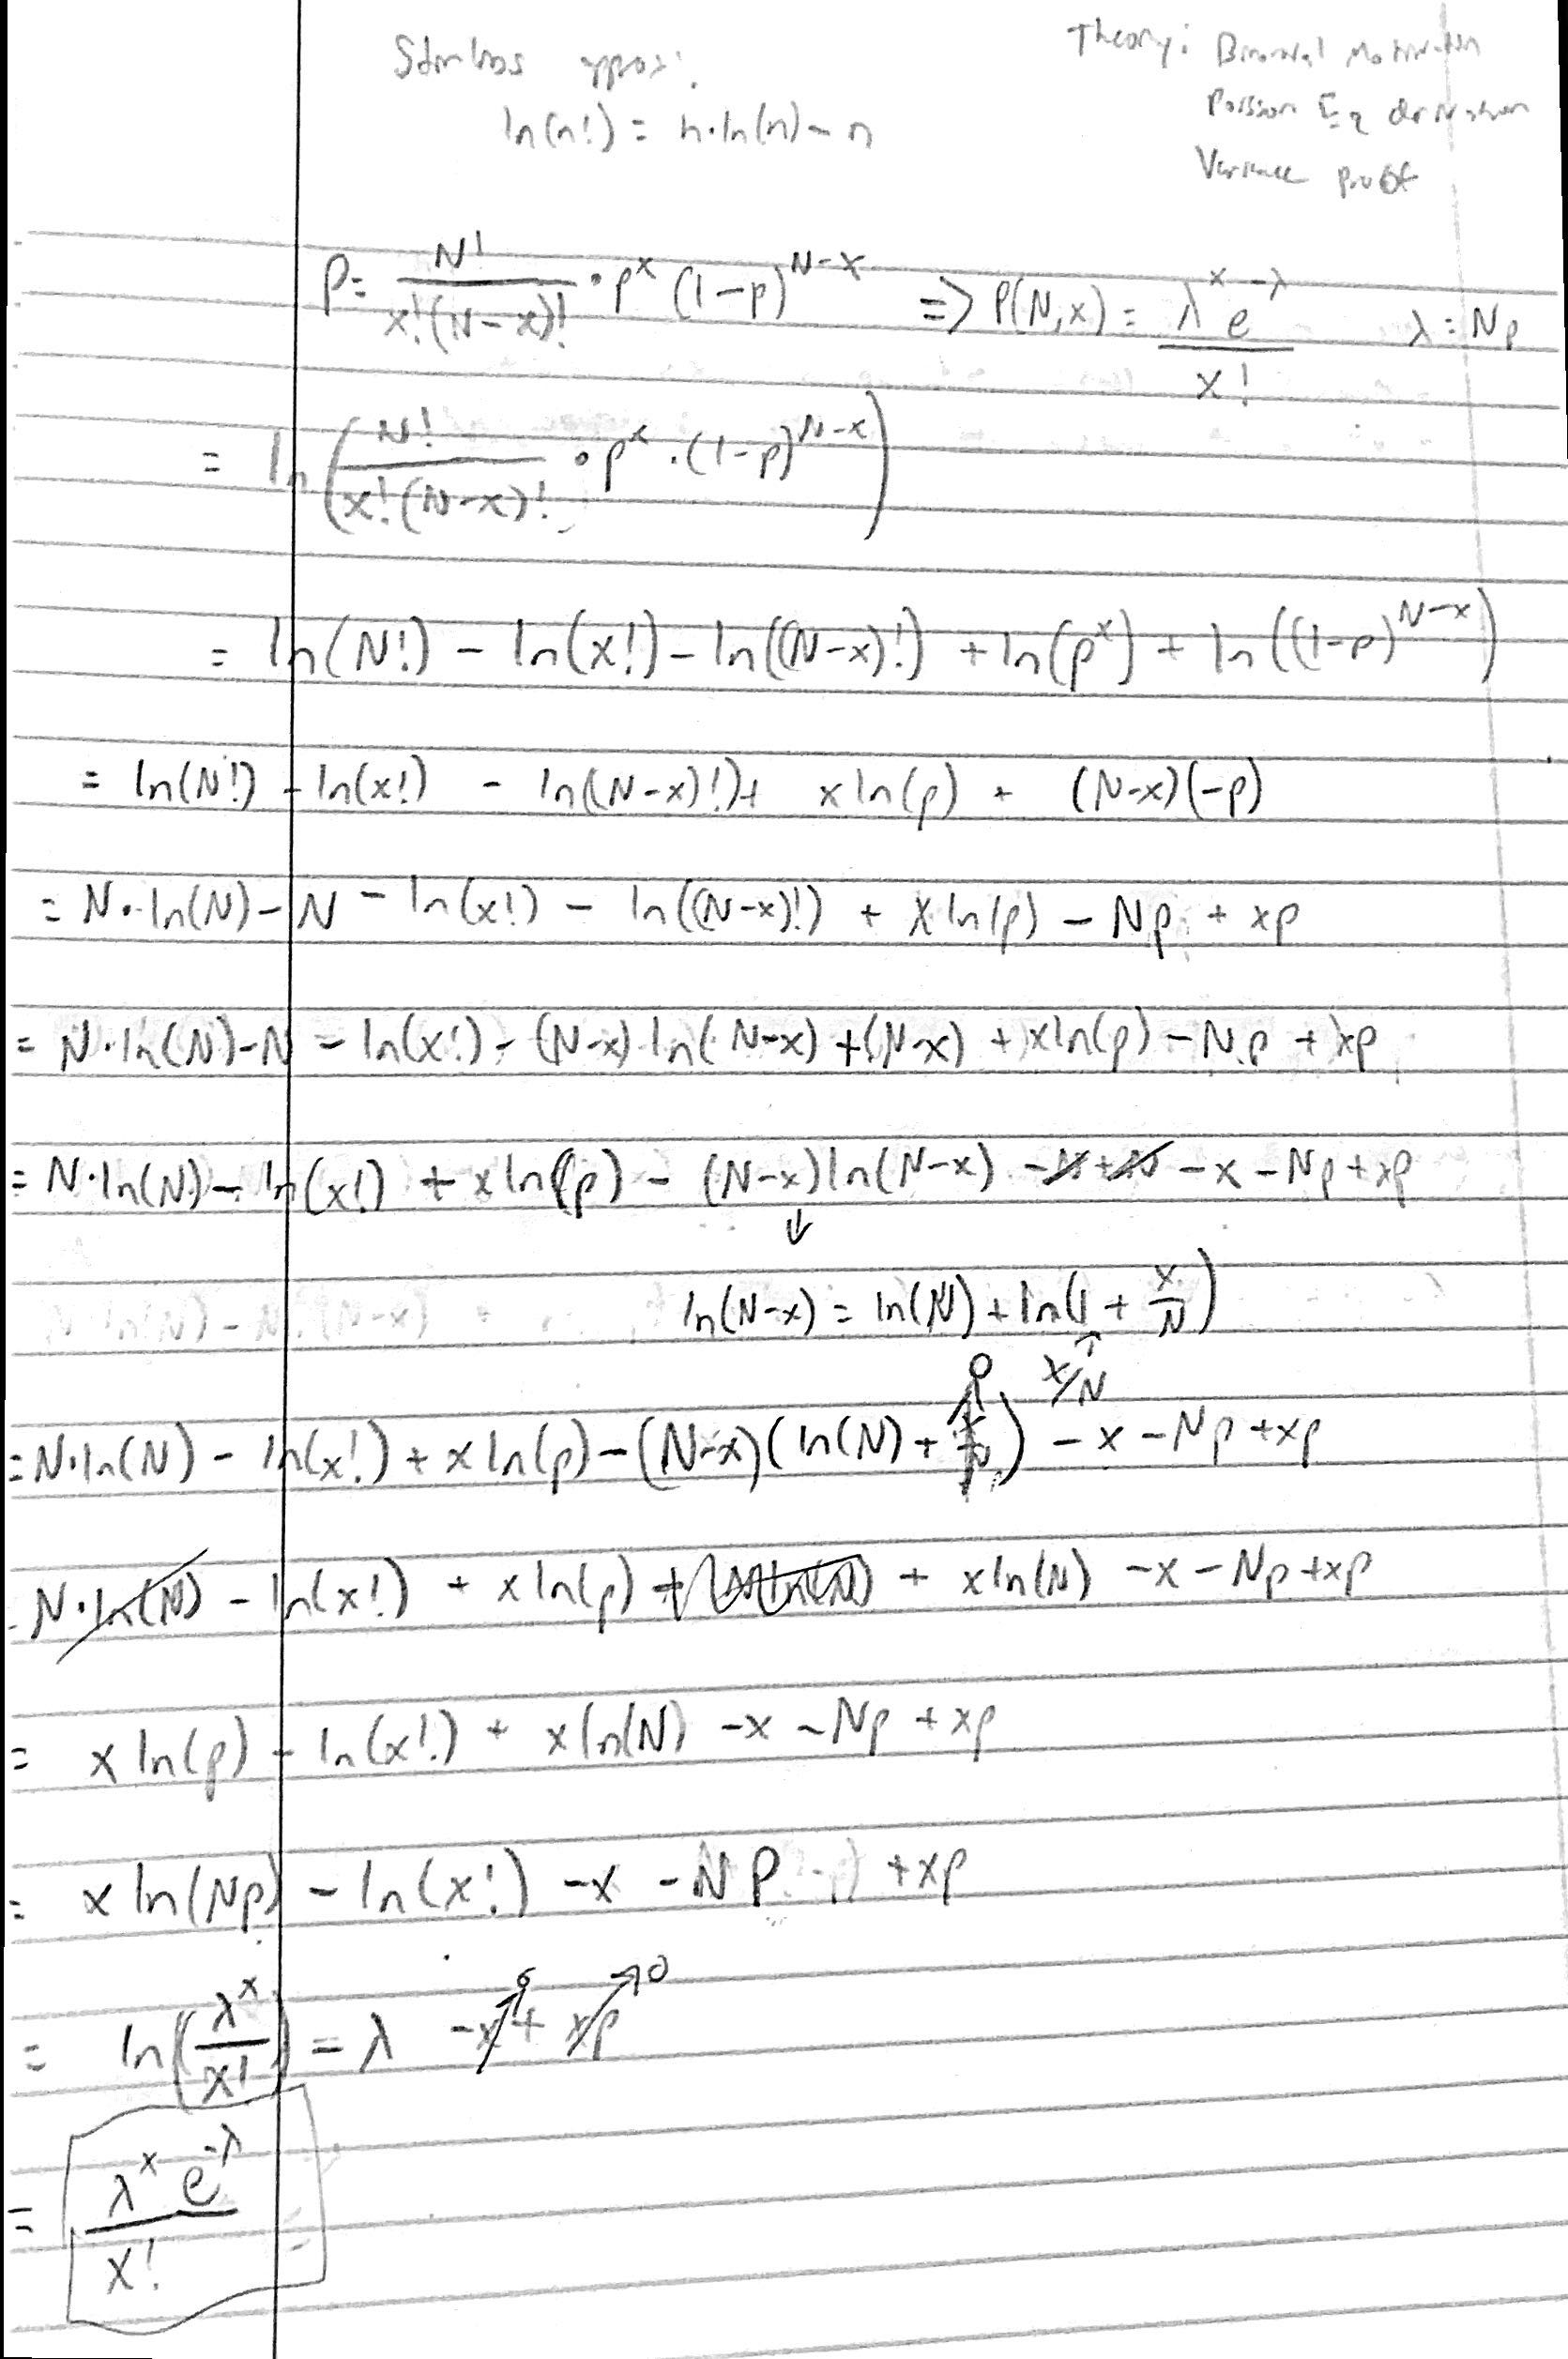

The variance of a distribution can be also written as the mean of the square minus the square of the mean:

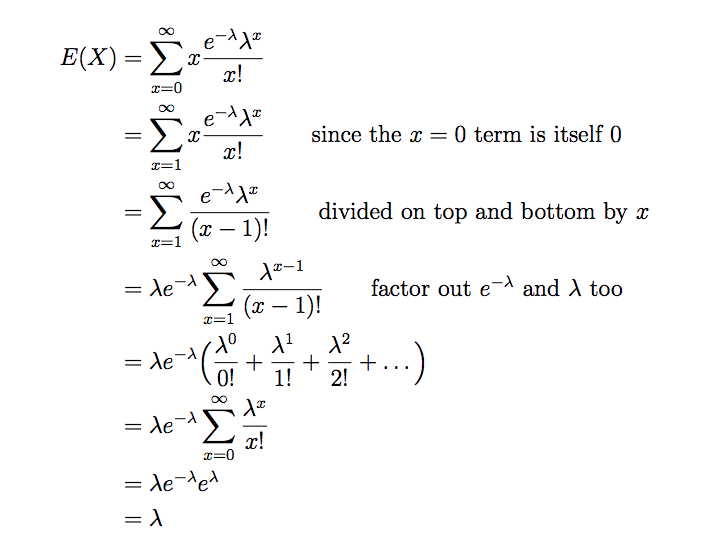

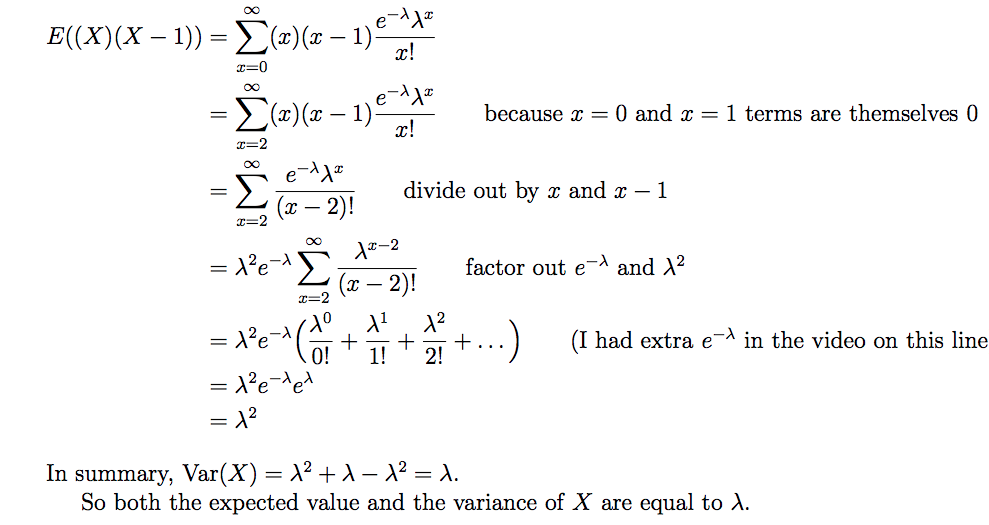

In [81]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [82]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

In [94]:
#1a-#1c

# monte carlo simulation generates random values based on the range and conditions specified

def prob(N):  # computes probability using frequentist method
    counts = np.zeros(N+1)
    for i in range(0,100):  # generates iteratively for the range specified
        draw = np.random.randint(2, size=N) 
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts/100
    return prob
       
def probx(N,x):  # takes specific inputs of N and x from user
    return prob(N)[x]
print (probx(5,4))  # example: probability for (N=5,x=4)


0.23


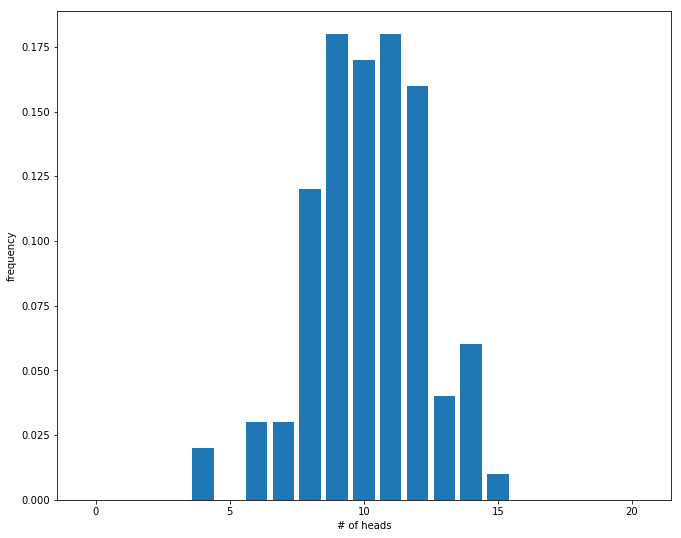

In [95]:
#1d

N = 20

def prob(N):  # computes probability using frequentist method
    counts = np.zeros(N+1)
    for i in range(0,100): # generates iteratively for the range specified
        draw = np.random.randint(2, size=N)  
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts/100 
    return prob

plt.bar(np.arange(N+1), prob(N))  # histogram of P(20,x), where x goes from 0 to 20 heads
plt.xlabel("# of heads")
plt.ylabel("frequency")


In [96]:
#1e

# comparing prob function from 1a-1d (uses frequentist method) to PNx function (uses binomial probability formula)

from scipy.misc import factorial

N = 20

def PNx(N):  # calculates analytical prediction using binomial probability formula
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))  # x goes from 0 to 20 heads 
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((0.5)**x)*((1-0.5)**(N-x))
    return PNx

plt.bar(np.arange(N+1), prob(N))  # histogram from 1d, P(20,x) using frequentist approach
plt.plot(np.arange(N+1), PNx(N))  # overplot analytical prediction of P(20,x)
plt.xlabel("# of heads")
plt.ylabel("frequency")


In [97]:
#1f

# expected value for number of successful outcomes (heads) for binomial distribution, N=20 trials

def PNx(N):  # calculates analytical prediction using binomial probability formula
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((0.5)**x)*((1-0.5)**(N-x))
    return PNx

def exp_val(N):  # numerically calculates the expectation value for the number of successful outcomes
    x = (np.arange(N+1))  # x goes from 0 to 20 heads
    for i in range(0, N):  # generates iteratively for the range specified
        exp_val = np.sum(x*PNx(N)) 
        return exp_val
print(exp_val(20))  # expected number of heads for N=20 trials 


10.0


In [98]:
#1f

# expected value for number of successful outcomes (heads) for binomial distribution, N=40 trials

def PNx(N):  # calculates analytical prediction using binomial probability formula
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((0.5)**x)*((1-0.5)**(N-x))
    return PNx

def exp_val(N):  # numerically calculates the expectation value for the number of successful outcomes
    x = (np.arange(N+1))  # x goes from 0 to 40 heads
    for i in range(0, N):  # generates iteratively for the range specified
        exp_val = np.sum(x*PNx(N))  
        return exp_val
print(exp_val(40))  # expected number of heads for N=40 trials 


20.0


0.0


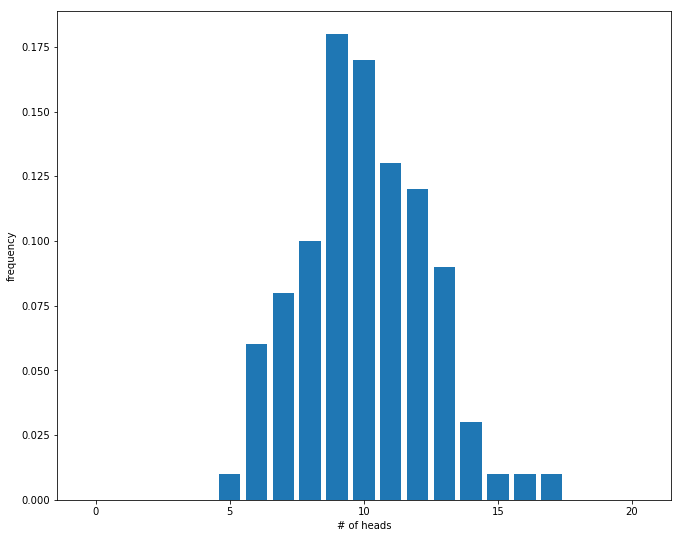

In [99]:
#2b

# simulation, poissonian limit approximation for large N = 100

def prob(N):  # computes probability using frequentist approach
    counts = np.zeros(N+1)
    for i in range(0,100):  # generates iteratively for range specified
        draw = np.random.randint(2, size=N) 
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts/100
    return prob
       
def probx(N,x):  # user defines probability of success by choosing inputs N trials and x successes.
    return prob(N)[x]
print (probx(100,10))  # example: probability for (N=100, x=10)

plt.bar(np.arange(N+1), prob(N))  # histogram of P(100,x), where x goes from 0 to 100 heads
plt.xlabel("# of heads")
plt.ylabel("frequency")


In [100]:
#2c

# Exact analytical prediction using the full binomial probability distribution

from scipy.misc import factorial

N = 100

def PNx(N):  # calculates analytical prediction using binomial probability formula
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))  # x goes from 0 to 100 heads 
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((0.5)**x)*((1-0.5)**(N-x))
    return PNx
print(PNx(N))


[  7.88860905e-31   7.88860905e-29   3.90486148e-27   1.27558808e-25
   3.09330110e-24   5.93913812e-23   9.40363535e-22   1.26277389e-20
   1.46797465e-19   1.50059631e-18   1.36554264e-17   1.11726216e-16
   8.28636101e-16   5.60922899e-15   3.48573516e-14   1.99848816e-13
   1.06169683e-12   5.24603142e-12   2.41900338e-11   1.04399093e-10
   4.22816327e-10   1.61072886e-09   5.78398092e-09   1.96152396e-08
   6.29322272e-08   1.91313971e-07   5.51867223e-07   1.51252498e-06
   3.94336870e-06   9.79043264e-06   2.31706906e-05   5.23209142e-05
   1.12816971e-04   2.32471335e-04   4.58105277e-04   8.63855666e-04
   1.55973940e-03   2.69792760e-03   4.47287998e-03   7.11073227e-03
   1.08438667e-02   1.58690732e-02   2.22922695e-02   3.00686426e-02
   3.89525598e-02   4.84742966e-02   5.79583981e-02   6.65905000e-02
   7.35270104e-02   7.80286641e-02   7.95892374e-02   7.80286641e-02
   7.35270104e-02   6.65905000e-02   5.79583981e-02   4.84742966e-02
   3.89525598e-02   3.00686426e-02

In [101]:
#2c

# approximation of the true binomial prob. using the Poisson prob. distribution function (derived from Binomial PDF when p is small) 

from scipy.misc import factorial

N = 100

def poiss(N):  # uses Poisson model to numerically calculate the approximation of the true binomial result
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))  # x goes from 0 to 100 heads 
    poiss = ((np.exp(-N*p))*((N*p)**x))/(factorial(x))
    return poiss
print(poiss(N))


[  1.92874985e-22   9.64374924e-21   2.41093731e-19   4.01822885e-18
   5.02278606e-17   5.02278606e-16   4.18565505e-15   2.98975361e-14
   1.86859601e-13   1.03810889e-12   5.19054446e-12   2.35933839e-11
   9.83057663e-11   3.78099101e-10   1.35035393e-09   4.50117977e-09
   1.40661868e-08   4.13711376e-08   1.14919827e-07   3.02420597e-07
   7.56051492e-07   1.80012260e-06   4.09118773e-06   8.89388636e-06
   1.85289299e-05   3.70578598e-05   7.12651151e-05   1.31972435e-04
   2.35665063e-04   4.06319074e-04   6.77198457e-04   1.09225558e-03
   1.70664934e-03   2.58583233e-03   3.80269460e-03   5.43242086e-03
   7.54502897e-03   1.01959851e-02   1.34157699e-02   1.71997050e-02
   2.14996312e-02   2.62190624e-02   3.12131696e-02   3.62943832e-02
   4.12436173e-02   4.58262414e-02   4.98111320e-02   5.29905660e-02
   5.51985062e-02   5.63250063e-02   5.63250063e-02   5.52205944e-02
   5.30967254e-02   5.00912504e-02   4.63807874e-02   4.21643522e-02
   3.76467430e-02   3.30234588e-02

In [116]:
#2c

# the overplot of the blue theory line represents the analytical (binomial) prediction

# the overplot of the red theory line represents the poisson approximation of the true binomial

# Binomial distribution gives us a more gaussian/normal/bellshaped curve. 

# Poisson approximates this well as we can see by its shape. 

plt.bar(np.arange(N+1), prob(N))  # histogram from 1d, P(20,x) using frequentist approach
plt.plot(np.arange(N+1), PNx(N))  # overplot analytical prediction of P(20,x)
plt.plot(np.arange(N+1), poiss(N), color="red")  # overplot poisson approximation of true binomial
plt.xlabel("# of heads")
plt.ylabel("frequency")


In [112]:
#2d

# numerical calculation of expected value for the variance of the Poisson PDF

from scipy.misc import factorial

N = 20

def poiss(N):  # uses Poisson model to numerically calculate the approximation of the true binomial result
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))  # x goes from 0 to 20 heads 
    poiss = ((np.exp(-N*p))*((N*p)**x))/(factorial(x))
    return poiss

def exp_x(N):  # numerically calculates the expectation value for the variance of the Poisson PDF
    x = (np.arange(N+1))  # x goes from 0 to 20 heads
    for i in range(0, N):  # generates iteratively for the range specified
        exp_x = np.sum((x*(x-1))*poiss(N))
        return exp_x
print(exp_x(N))
        
V = (99.2813+(20*0.5)-((20*0.5)**2))  # expected value for Poisson variance "V", when N = 20 trials
print(V)


99.2813495396
9.281300000000002


In [103]:
#2d

# From 1f: expected value for number of successful outcomes (heads) for binomial distribution, N=20 trials

# As anticipated, both the expected value and the variance of X (approx./round) are equal to λ (which is n*p).

from scipy.misc import factorial

def PNx(N):  # calculates analytical prediction using binomial probability formula
    p = 0.5  # probability of success for a fair coin
    x = (np.arange(N+1))
    PNx = (factorial(N)/((factorial(x)*factorial(N-x))))*((0.5)**x)*((1-0.5)**(N-x))
    return PNx

def exp_val(N):  # numerically calculates the expectation value for the number of successful outcomes
    x = (np.arange(N+1))  # x goes from 0 to 20 heads
    for i in range(0, N):  # generates iteratively for the range specified
        exp_val = np.sum(x*PNx(N)) 
        return exp_val
print(exp_val(20))  # expected number of heads for N=20 trials 


10.0
